In [2]:
"""=============================================================================
Bài toán 1: Một nhà sản xuất đang điều tra tuổi thọ hoạt động của pin laptop
          máy tính xách tay (life_batteries.txt).
   1. Tạo life_array từ nội dung tập tin.
   2. Vẽ biểu đồ phân phối tần suất của life_array
   3. Làm bảng phân phối tần suất cho dữ liệu theo các khoảng:
         120-129, 130-139, 140-149, 150-159, 160 - 169.
   4. Vẽ biểu đồ khối cho bảng phân phối tần suất trên. 
      Biểu đồ câu 2 và câu 4 nói lên điều gì?
   5. Thống kê cơ bản cho life_array; 
      mean, median, mode (những giá trị nào? số lần bao nhiêu?), max, min, ...
   6. Tìm độ nhọn, độ xiên của dữ liệu. Nhận xét kết quả
   -----------------------------------------------------------------------------
   Bổ sung sau khi học bài 6:
   7. Nếu số lượng mẫu nhỏ hơn 150, hãy cho biết xác suất các mẫu nhỏ hơn 150. 
      Nhận xét.
   8. Tìm xác suất của P(140 ≤ X ≤ 155). Nhận xét
============================================================================="""
print()

In [18]:
import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sbn

from matplotlib.gridspec import GridSpec
from scipy import stats

In [16]:
print('==========================================================')
print('*** 1. Read life_batteries.txt into batt_life_arr array***')
print('==========================================================')

f = open('data_Buoi7&8/life_batteries.txt')
read_bat = f.read().replace('\n',' ').split()
batt_life_arr = np.array([ eval(item) for item in read_bat])

print("\nBatteries' life array:\n",batt_life_arr)

*** 1. Read life_batteries.txt into batt_life_arr array***

Batteries' life array:
 [130 145 126 146 164 130 132 152 145 129 133 155 140 127 139 137 131 126
 145 148 125 132 126 126 126 135 131 129 147 136 129 136 156 146 130 146
 132 142 132 132]


*** 2. Distribution plot of batt_life_arr array***


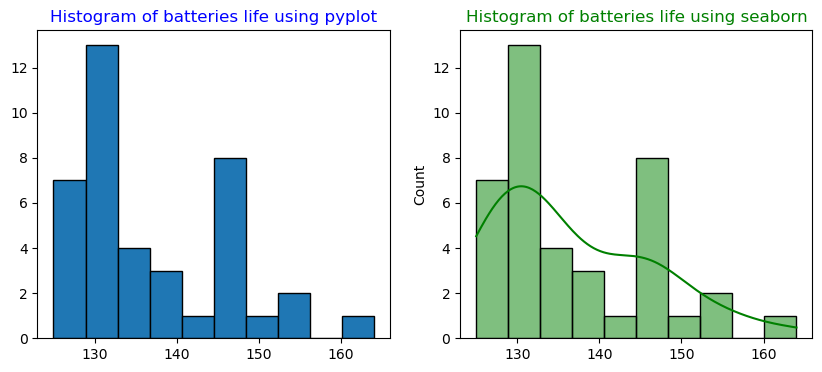

In [36]:
print('==========================================================')
print('*** 2. Distribution plot of batt_life_arr array***')
print('==========================================================')

fig = plt.figure(figsize=(10,4))
grsp = GridSpec(nrows=1, ncols=2)

hist_plt = fig.add_subplot(grsp[0,0])
hist_plt.set_title('Histogram of batteries life using pyplot', color='blue')
hist_plt.hist(batt_life_arr, edgecolor='black')

hist_sbn = fig.add_subplot(grsp[0,1])
hist_sbn.set_title('Histogram of batteries life using seaborn', color='green')
sbn.histplot(batt_life_arr, kde=True, color='green', bins=10)

plt.show()

In [77]:
print('======================================================================')
print('*** 3. Create distribution frequency table of batt_life_arr array ***')
print('            120-129, 130-139, 140-149, 150-159, 160 - 169             ')
print('======================================================================')

freq_table = pd.DataFrame()

freq_table['120-129'] = [(np.extract((batt_life_arr>=120) & (batt_life_arr<=129), batt_life_arr)).size]
freq_table['130-139'] = [(np.extract((batt_life_arr>=130) & (batt_life_arr<=139), batt_life_arr)).size]
freq_table['140-149'] = [(np.extract((batt_life_arr>=140) & (batt_life_arr<=149), batt_life_arr)).size]
freq_table['150-159'] = [(np.extract((batt_life_arr>=150) & (batt_life_arr<=159), batt_life_arr)).size]
freq_table['160-169'] = [(np.extract((batt_life_arr>=160) & (batt_life_arr<=169), batt_life_arr)).size]
#numpy.extract(condition, array) will return the elements of an array that satisfies the given condition

freq_table = freq_table.transpose() #transpose so that the intervals like 120-129 will become the indices
freq_table.columns=['frequency'] #Change colname from 0 to 'frequency'
freq_table

*** 3. Create distribution frequency table of batt_life_arr array ***
            120-129, 130-139, 140-149, 150-159, 160 - 169             


,frequency
120-129,10
130-139,16
140-149,10
150-159,3
160-169,1


*** 4. Draw barplot for batteries life frequency table ***


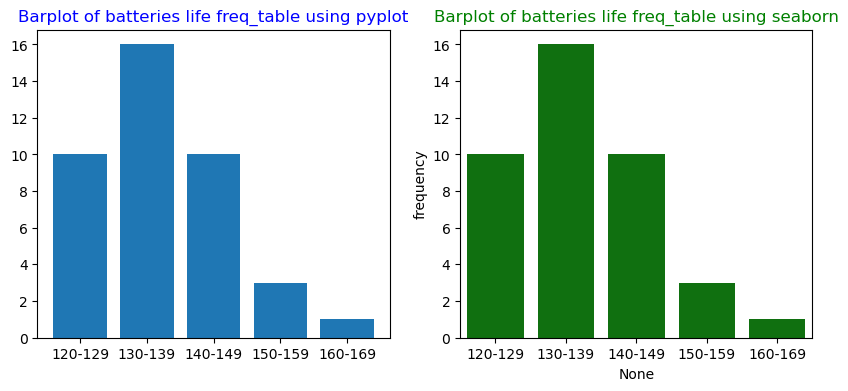


Comments about this batteries life data array:
**1: Most of the data concentrate in the range of 130-139, some exceeds 150
**2: Therefore, the center of this dataset lies some where between 130 and 139


In [92]:
print('======================================================================')
print('*** 4. Draw barplot for batteries life frequency table ***')
print('======================================================================')

fig = plt.figure(figsize=(10,4))
grsp = GridSpec(nrows=1, ncols=2)

bar_plt = fig.add_subplot(grsp[0,0])
bar_plt.set_title('Barplot of batteries life freq_table using pyplot', color='blue')
bar_plt.bar(freq_table.index, freq_table.frequency)

bar_sbn = fig.add_subplot(grsp[0,1])
bar_sbn.set_title('Barplot of batteries life freq_table using seaborn', color='green')
sbn.barplot(x=freq_table.index, y=freq_table.frequency, color='green')

plt.show()

print('\nComments about this batteries life data array:')
print('**1: Most of the data concentrate in the range of 130-139, some exceeds 150')
print('**2: Therefore, the center of this dataset lies some where between 130 and 139')

*** 5. Basic descriptive statistics for batt_life_arr ***
          mean, median, max, min, range, mode            

Mean of batteries life (minute) = 136.85

Median of batteries life (minute) = 132.5

Max of batteries life (minute) = 164

Min of batteries life (minute) = 125

Range(max - min) of batteries life (minute) = 39

Mode of batteries life (minute) = 126
Mode count of batteries life = 5



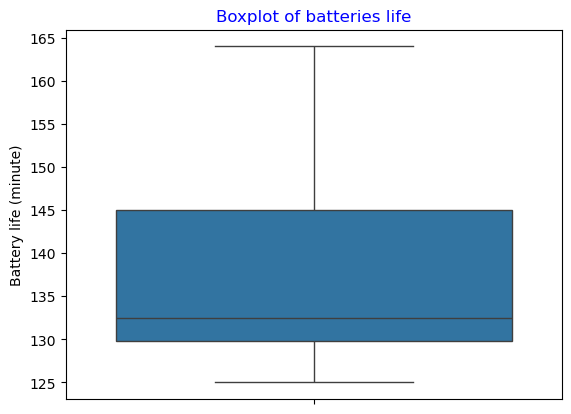

In [123]:
print('======================================================================')
print('*** 5. Basic descriptive statistics for batt_life_arr ***')
print('          mean, median, max, min, range, mode            ')
print('======================================================================')

print(f'\nMean of batteries life (minute) = {np.mean(batt_life_arr)}')
print(f'\nMedian of batteries life (minute) = {np.median(batt_life_arr)}')
print(f'\nMax of batteries life (minute) = {np.max(batt_life_arr)}')
print(f'\nMin of batteries life (minute) = {np.min(batt_life_arr)}')
print(f'\nRange(max - min) of batteries life (minute) = {np.ptp(batt_life_arr)}')

batt_mode = stats.mode(batt_life_arr)
print(f'\nMode of batteries life (minute) = {batt_mode[0]}')
print(f'Mode count of batteries life = {batt_mode[1]}')
print()
sbn.boxplot(batt_life_arr)
plt.title('Boxplot of batteries life', color='blue') #As we can see from the boxplot, there are no outliers
plt.ylabel('Battery life (minute)')
plt.show()

In [131]:
print('========================================================================')
print('*** 6. Calculate skewness and kurtosis batt_life_arr, give comments ***')
print('========================================================================')

print(f'\nSkewness of batteries life = {stats.skew(batt_life_arr)}')

print(f'\nKurtosis of batteries life = {stats.kurtosis(batt_life_arr, fisher=False)}')
print(f'Excess kurtosis of batteries life = {stats.kurtosis(batt_life_arr, fisher=True)}')

print('\nComments about skewness and kurtosis of batteries life:')
print('**1: Skewness > 0 so ')
print('**2: Therefore, the center of this dataset lies some where between 130 and 139')

print('\n****************************')
batt_desc = stats.describe(batt_life_arr)
print('Descriptive statistics of batteries life:')
for attribute in dir(batt_desc):
    if attribute.startswith('__') or attribute.startswith('_'): continue
    elif attribute == 'count' or attribute=='index': continue
    else: print(f'  Batteries life {attribute}: {getattr(batt_desc, attribute)}')

*** 6. Calculate skewness and kurtosis batt_life_arr, give comments ***

Skewness of batteries life = 0.8455287049086152

Kurtosis of batteries life = 2.923867616922444
Excess kurtosis of batteries life = -0.07613238307755621

Comments about skewness and kurtosis of batteries life:
**1: Skewness > 0 so 
**2: Therefore, the center of this dataset lies some where between 130 and 139

****************************
Descriptive statistics of batteries life:
  Batteries life kurtosis: -0.07613238307755621
  Batteries life mean: 136.85
  Batteries life minmax: (125, 164)
  Batteries life nobs: 40
  Batteries life skewness: 0.8455287049086152
  Batteries life variance: 95.87435897435897


In [151]:
print('============================================================================')
print('*** 7. Calculate probability of batt_life_arr that <= 150 (or P(x<=150)) ***')
print('============================================================================')

batt_150_count = np.extract(batt_life_arr <= 150, batt_life_arr).size #Count the number of battery life that <= 150 minute

batt_150_probal = batt_150_count/batt_life_arr.size
print(f'\nCount of baterries life that <= 150: {batt_150_count}')
print(f'\nSize of batt_life_arr: {batt_life_arr.size}')
print(f'\nP(x <= 150) = {batt_150_count} / {batt_life_arr.size} = {batt_150_probal}') 

#So, 90% of batteries will have life span equal or less than 150 minute

*** 7. Calculate probability of batt_life_arr that <= 150 (or P(x<=150)) ***

Count of baterries life that <= 150: 36

Size of batt_life_arr: 40

P(x <= 150) = 36 / 40 = 0.9


In [147]:
print('===========================================================================================')
print('*** 7. Calculate probability of batt_life_arr that >= 140 and <= 150 (or P(140<=x<=150)) ***')
print('============================================================================================')

batt_140_probal = (np.extract(batt_life_arr <= 140, batt_life_arr).size) / batt_life_arr.size

print(f'\nP(140 <= x <= 140 <=) = P(x<=150) - P(x<=140) = {batt_150_probal} - {batt_140_probal} = {batt_150_probal - batt_140_probal}')

*** 7. Calculate probability of batt_life_arr that >= 140 and <= 150 (or P(140<=x<=150)) ***

P(140 <= x <= 140 <=) = P(x<=150) - P(x<=140) = 0.9 - 0.675 = 0.22499999999999998
